## визуализация с помощью pandas

In [1]:
import  pandas as pd 
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [3]:
df['total_bill'].max()

50.81

In [4]:
%matplotlib inline

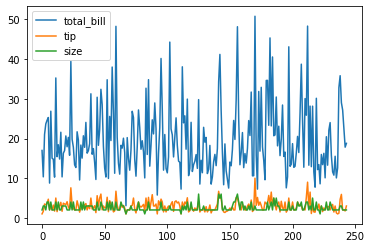

In [5]:
df.plot()

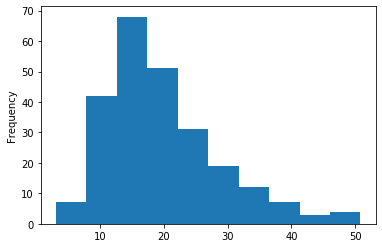

In [6]:
df['total_bill'].plot(kind = 'hist')

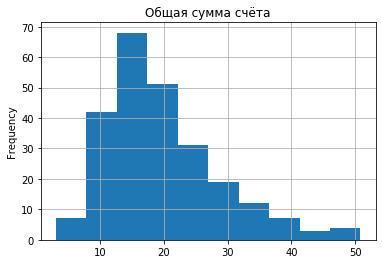

In [7]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

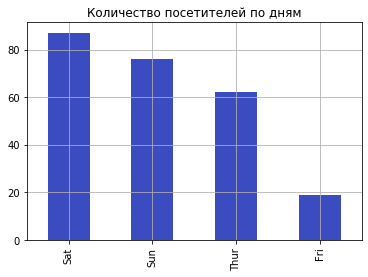

In [8]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

In [9]:
type(df['day'].value_counts())

pandas.core.series.Series

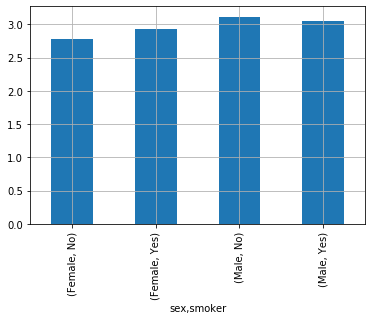

In [10]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0819D850>,
      dtype=object)

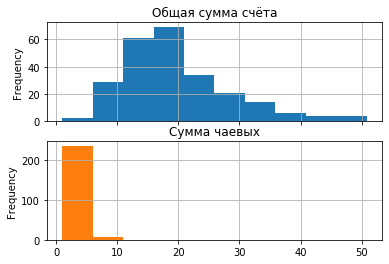

In [11]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

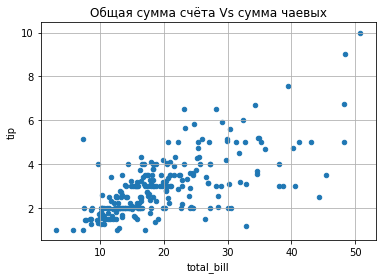

In [12]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

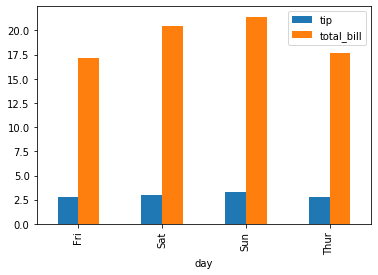

In [17]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

In [13]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean')

,tip,total_bill
day,,
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000
Thur,2.771452,17.682742


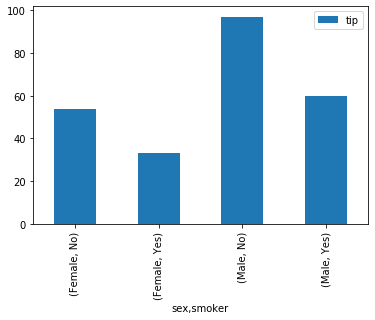

In [14]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

## визуализация с помощью Matplotlib

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('tips.csv')

Существует несколько подходов к созданию графиков в Matplotlib. Один из них — объектно-ориентированный подход, он наиболее прозрачный и мощный по функционалу.

Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты. В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создается координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает все отведенное место в области (ширина и высота равны 1).

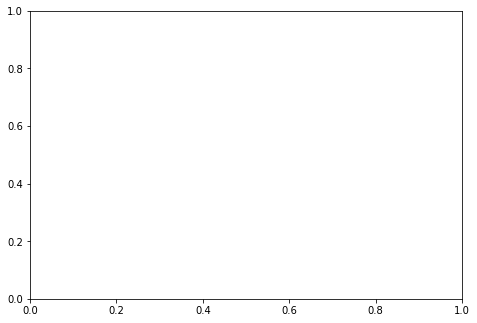

In [16]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])

Теперь мы можем разместить в созданной нами координатной плоскости любую графическую информацию. Например, для построения гистограммы распределения признака «Общая сумма счёта» нам следует применить к axes метод hist:

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

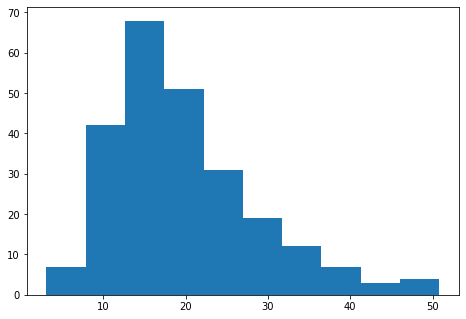

In [17]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

то же самое

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

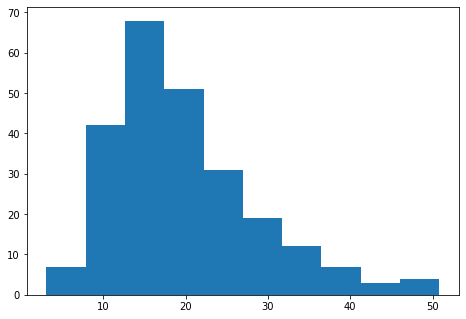

In [18]:
plt.figure().add_axes([0, 0, 1, 1]).hist(df['total_bill'])

У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:

    axes.set_title — заголовок диаграммы;
    axes.set_ylabel — заголовок для оси ординат;
    axes.set_xlabel — заголовок для оси абсцисс.


Text(0.5, 0, 'Сумма заказа, USD')

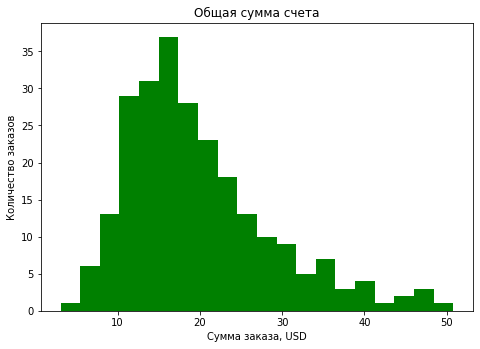

In [19]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Для размещения на координатной плоскости графиков других видов, необходимо вызывать соответствующие методы применительно к объекту axes. Например, для создания scatter plot, отображающего связь между суммой счёта и размером чаевых, воспользуемся методом scatter:

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

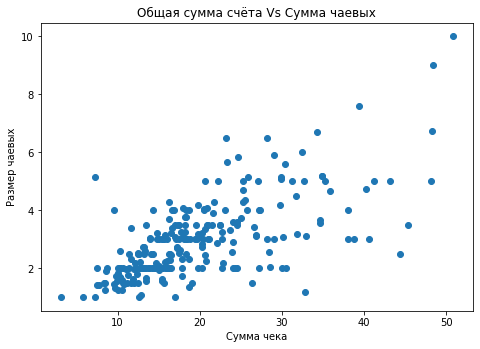

In [20]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

plt.scatter

С помощью параметра marker можно настроить форму маркеров, используемых для отображения каждого индивидуального случая. 

Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, а следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

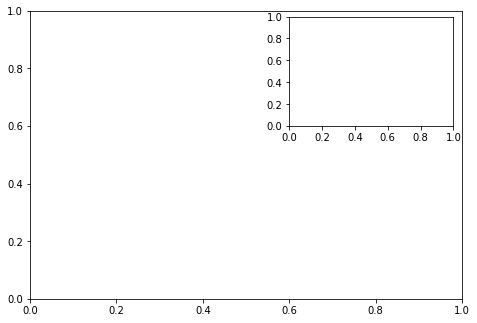

In [21]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])

В основную координатную плоскость разместим гистограмму распределения признака «Общая сумма счета», а в дополнительную — данные о максимальном и минимальном значении этого признака по дням недели. Для создания вспомогательного графика нужно предварительно обработать основной датафрейм и извлечь из него нужную информацию.

In [24]:
tips_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
tips_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


Для размещения каждого графика применим соответствующий метод к объекту, представляющему нужную нам систему координат: 

    к объекту main_axes применим метод hist;
    для объекта insert_axes используем метод bar.


<BarContainer object of 4 artists>

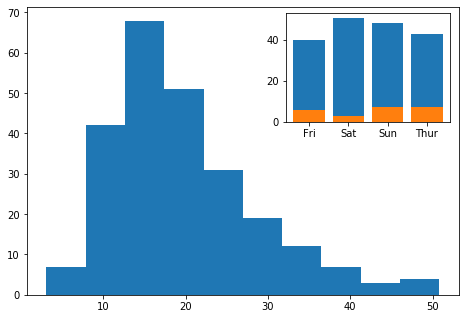

In [23]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

Недостатком графика является то, что на вспомогательной диаграмме столбцы перекрывают друг друга, из-за чего появляется риск потерять часть информации. Для решения этой проблемы поработаем с настройками метода bar:

Параметр align указывает, следует ли размещать столбцы для отображения каждого значения в центре (align = 'center', используется по умолчанию) или необходимо сместить их к краю (align = 'edge') . С помощью параметра width мы задаём ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца. Отрицательное значение ширины позволит нам сдвинуть столбцы, отображающие данный параметр, в левую сторону (работает, если align = 'edge'):

<BarContainer object of 4 artists>

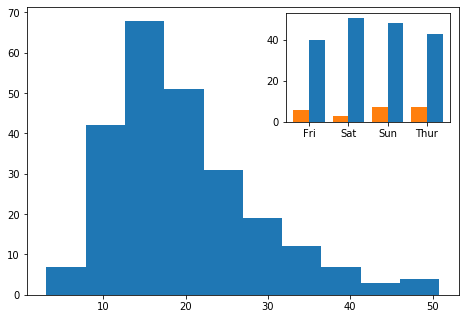

In [25]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge')

### Добавление легенды

Если на графике отображаются данные из нескольких столбцов датафрейма, необходимо сопроводить график дополнительными пояснениями: какой цвет соответствует выводимой информации. Для этого добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр label. Место размещения легенды на координатной плоскости задаётся с помощью параметра loc:

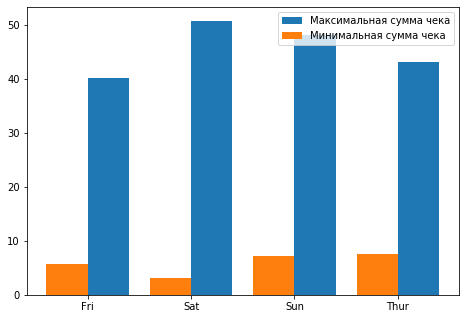

In [26]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
         width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
         width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

Чтобы легенда не перекрывала часть данных, увеличиваем максимальное значение оси ординат с помощью метода set_ylim к объекту axes:

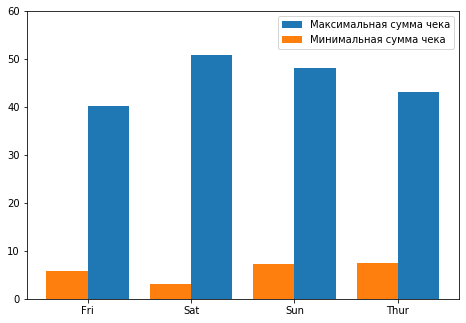

In [28]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], width = 0.4, align = 'edge', label = "Максимальная сумма чека")
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], width = -0.4, align = 'edge', label = "Минимальная сумма чека")
axes.legend(loc = 1)


https://pyprog.pro/mpl/mpl_adding_a_legend.html
более подробоное руководство matplotlib legend

### Subplots

Разместить в одном пространстве несколько графиков можно и с помощью метода subplots. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):

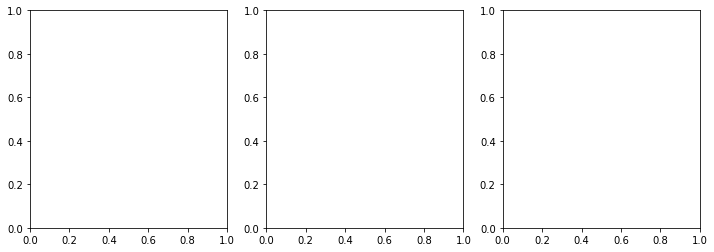

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

После выполнения кода переменная axes содержит список, состоящий из трех объектов. Обращаться к элементам списка можно по индексам (от 0 до 2):

Text(0.5, 1.0, 'Общая сумма счёта Vs Cумма чаевых')

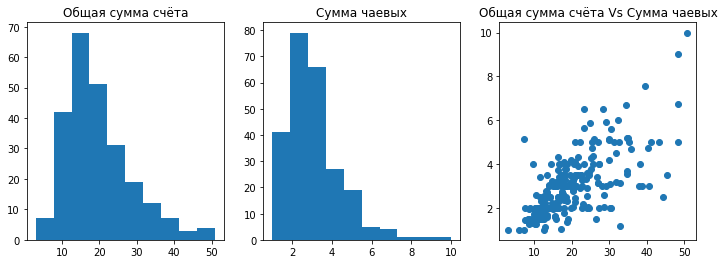

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счёта')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes[2].set_title('Общая сумма счёта Vs Cумма чаевых')

практика

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

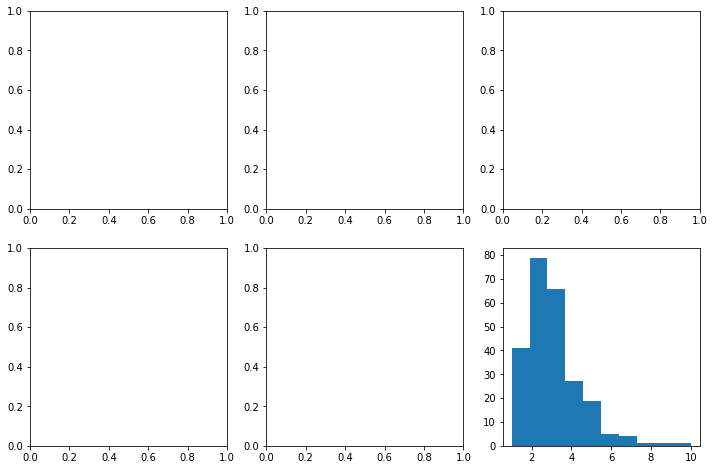

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))
axes[1][2].hist(df['tip'])

## Создание линейных графиков

### Подготовка данных

Для выполнения заданий этого блока мы будем использовать не датасет, а специально сгенерированный одномерный массив NumPy. Для генерации массива нам необходимо импортировать библиотеку NumPy:

In [35]:
import numpy as np 

Теперь сгенерируем массив из 1000 чисел, равномерно распределённых в интервале от -3 до 3. Также создадим переменную, содержащую значения функции e^x на отрезке [-3, 3]:

In [36]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

### Отрисовка одной кривой

Функция matplotlib.pyplot.plot позволяет отрисовать последовательность значений — первым аргументом подается последовательность чисел аргумента, вторым — последовательность значений функции для каждого аргумента:

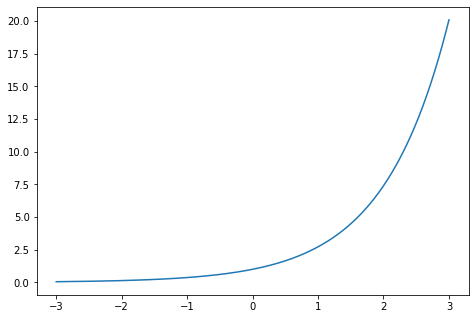

In [37]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

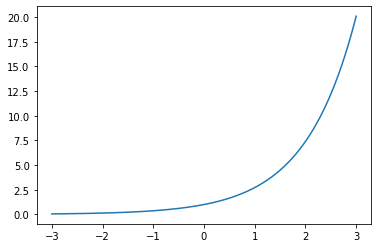

In [38]:
plt.plot(x,y1)

### Отрисовка нескольких кривых

Функцию plot можно вызвать несколько раз для отрисовки дополнительного контента. В таком случае отрисовка выполнится в том же matplotlib.pyplot.figure, который в данном случае создался автоматически при первой отрисовке. Для примера добавим к нашему графику какой-нибудь полином третьей степени:

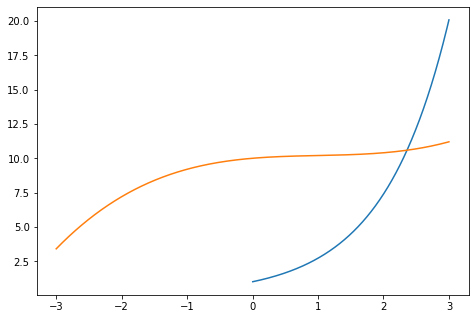

In [39]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

Обратите внимание, полученным графикам назначены разные цвета. Эти цвета берутся из палитры по умолчанию и всегда назначаются в одном и том же порядке при добавлении новых графиков.

### Стили линий

Воспользуемся функцией matplotlib.pyplot.figure для создания фигуры заданного размера. Размер фигуры задается в дюймах. При этом для отображения на реальном дисплее количество пикселей определяется за счет установленного dpi — dots per inch (по умолчанию 100).

При визуализации большого объема данных часто приходится выделять те или иные графики. Как и при написании текстов, это можно сделать с помощью форматирования. Форматирование линии определяется стилем отрисовки, маркировкой или и тем и другим одновременно. Описание возможных стилей и маркеров можно посмотреть в документации.

Отрисуем линию в стиле "dashed line":

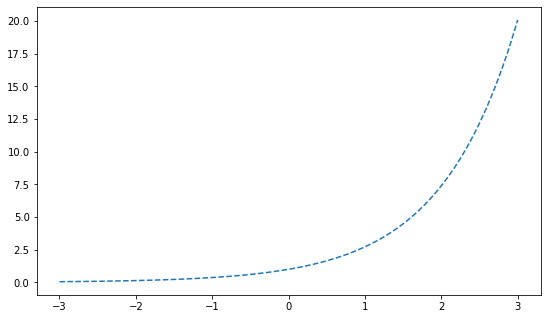

In [40]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

### Цвета и маркеры

Чтобы задать тип маркера и цвет линии, воспользуемся методом форматирования линии. Его структура — это строка, содержащая в полном виде символы, обозначающие цвет маркера, тип маркера и тип линии. Возможен пропуск любого количества из этих трёх параметров. Мы отрисуем линию в фиолетовом цвете ('m' — magenta) с маркером ромба ('D' — diamond marker).

Остальные цвета и маркеры можно посмотреть в документации:

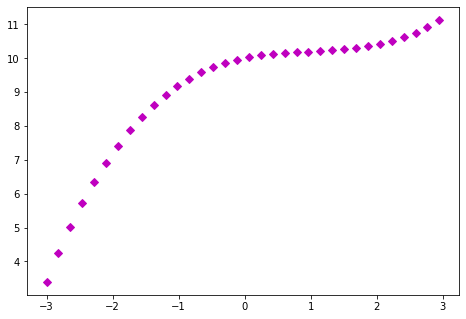

In [41]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

## Seaborn для продвинутых визуализаций 

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Импортируем библиотеки Seaborn, Matplotlib и Pandas для работы с датафреймами и корректного отображения информации в jupyter notebook:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

При использовании некоторых методов Seaborn система может выдавать предупреждающие сообщения, что метод применяется к определенному типу данных. Эти предупреждения не являются сообщениями об ошибках, их можно игнорировать и отключить выведение на экран:

In [10]:
import warnings; warnings.simplefilter('ignore')

In [44]:
df = pd.read_csv('tips.csv')

Для построения гистограммы распределения количественных признаков в библиотеке Seaborn используется метод distplot. Перед применением метода установим стандартные параметры отображения графиков с помощью команды sns.set():

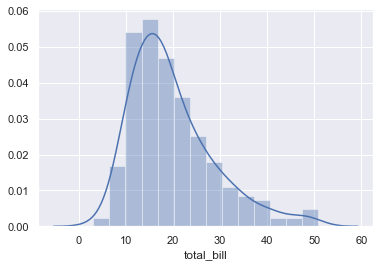

In [45]:
sns.set()
sns.distplot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется jointplot:

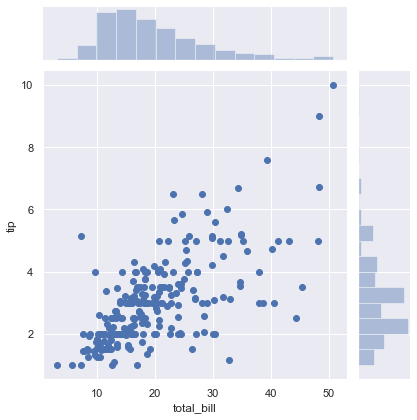

In [46]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df)

Характер представления информации в центральной части графика можно регулировать с помощью параметра kind. Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана, но и линию регрессии, выражающую общий характер связи между двумя величинами:

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

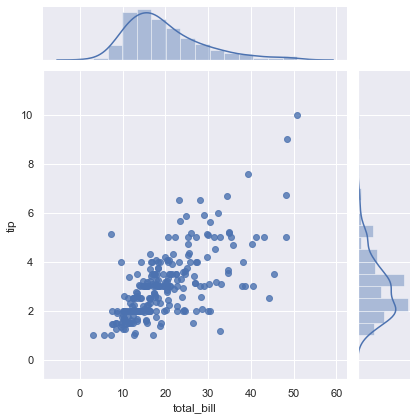

In [50]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

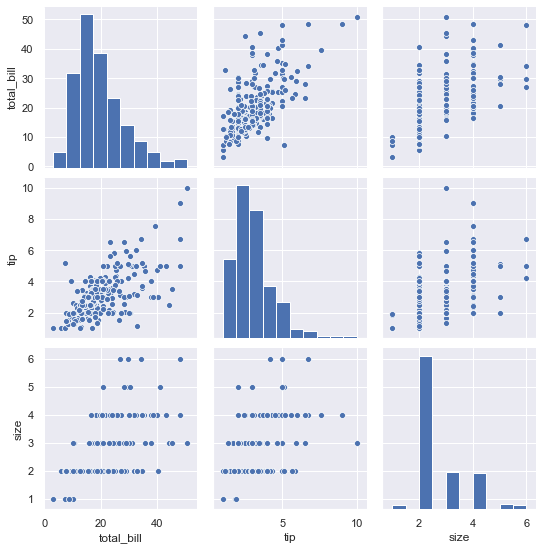

In [51]:
sns.pairplot(df)

### Работа с категориальными признаками

Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм, группируя нужные данные. В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы распределения категориального признака можно воспользоваться методом countplot:

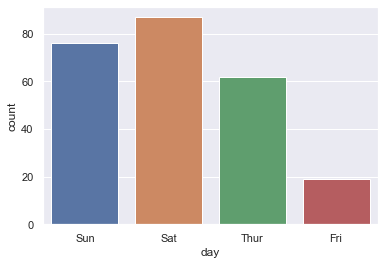

In [52]:
sns.countplot(x = 'day', data = df)

Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода barplot. Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator.

In [54]:
sns.barplot(x = 'sex', y = 'total_bill', data = df)

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

ругается из-за того что 32 битная версия виндоус на ПК

## Boxplots

### Box plot — тип графика, компонентами которого являются:

    Отрезок (Range), отражающий диапазон значений набора данных
    Прямоугольник (Box) — отображает границы основного объема данных. Левой границей считается значение 25%-ый квантиля, или Q1, первый квартал. Правой границей является 75%-ый квантиль, или Q3, третий квартал)
    Усы (whiskers) — отметки на оси, представляющие левый и правый "крайние" значения данных. Фактически эти значения не всегда являются минимумом или максимумом набора. Они представляют значения, отстоящие на 1.5*IQR влево или вправо от левой (Q1) или правой (Q2) границы соответственно. Здесь IQR - Interquartile Range (межквантильный диапазон) — ширина прямоугольника от Q1 до Q3
    Выбросы (Outliers) — значения, находящиеся за левым и правым "крайними" значениями на оси

Box plot explained

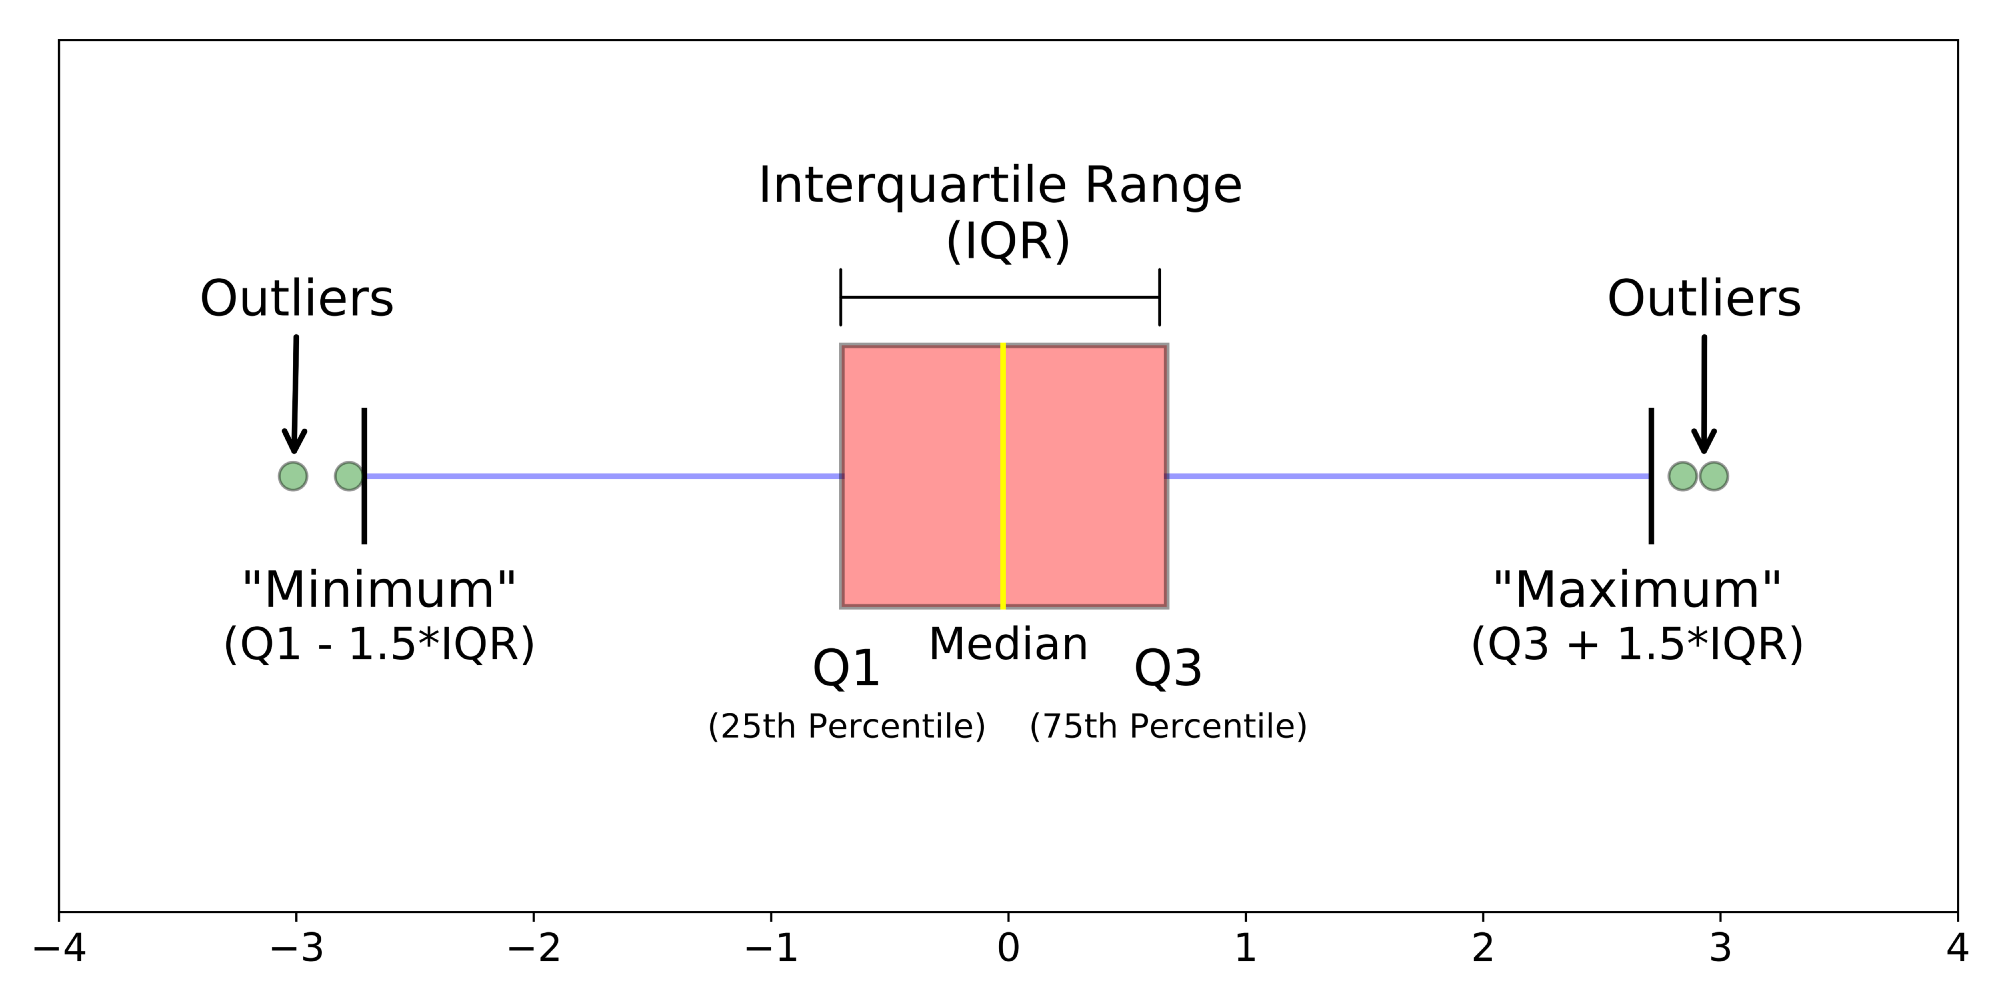

Для создания графиков такого типа в Seaborn используется метод boxplot. Он позволяет отобразить распределение заданного количественного признака по категориям, которые определяются значением заданного качественного признака. На диаграмме ниже показывается, как менялась сумма чаевых в зависимости от дня недели:

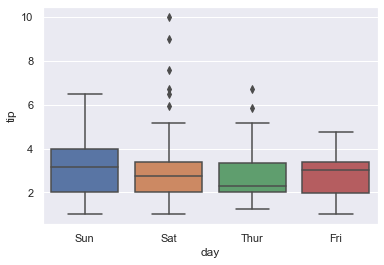

In [55]:
sns.boxplot(x = 'day', y = 'tip', data = df)

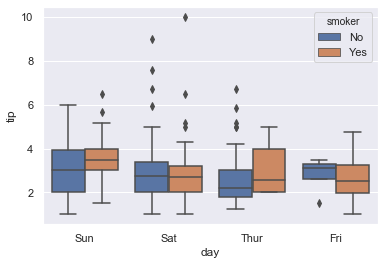

In [56]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

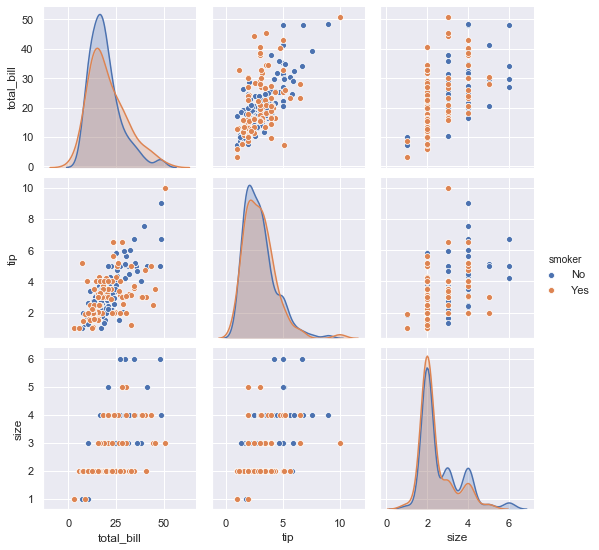

In [57]:
sns.pairplot(df, hue = 'smoker')

## Графики табличного типа
Степень связи между двумя величинами в Seaborn помогает оценить корреляционный анализ. Величина степени связи (коэффициент корреляции) может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

Для отображения информации о результатах корреляционного анализа в Seaborn часто используются тепловые карты (heatmap).  Рассмотрим, как создать такую карту. Сначала вычислим коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода corr(). Результат вычислений сохраним в новом датафрейме correlation:

In [59]:
correlation = df.corr()

Теперь мы можем передать созданный датафрейм с коэффициентами в качестве одного из параметров метода heatmap. Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр annot = True. Для использования более ярких цветов при заливке ячеек применяем цветовую палитр

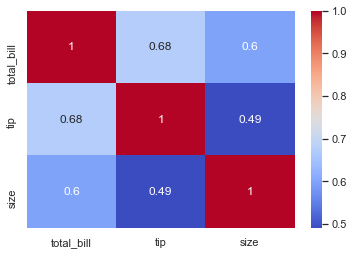

In [60]:
sns.heatmap(correlation,annot=True,cmap='coolwarm')

Библиотека Plotly не входит в стандартный набор модулей Anaconda, поэтому ее надо установить. Это можно сделать с помощью менеджера пакетов pip, который запускается из командной строки, или напрямую из jupyter notebook. В случае запуска менеджера пакетов из ячейки lupyter notebook перед текстом команды нужно добавить восклицательный знак.

Введите в свободную ячейку jupyter notebook команду:

In [66]:
!pip install plotly

  Using cached plotly-4.6.0-py2.py3-none-any.whl (7.1 MB)
  Using cached retrying-1.3.3.tar.gz (10 kB)


    ERROR: Error [WinError 87] Параметр задан неверно while executing command python setup.py egg_info
ERROR: Could not install packages due to an EnvironmentError: [WinError 87] Параметр задан неверно



In [71]:
!pip install cufflinks

  Using cached cufflinks-0.17.3.tar.gz (81 kB)


    ERROR: Error [WinError 87] Параметр задан неверно while executing command python setup.py egg_info
ERROR: Could not install packages due to an EnvironmentError: [WinError 87] Параметр задан неверно



### Основные типы графиков в Plotly

Перед созданием интерактивных визуализаций импортируйте необходимые библиотеки:

In [3]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

Для работы с библиотекой Plotly в режиме оффлайн включите этот режим:

In [4]:
init_notebook_mode(connected = True)
cf.go_offline()

In [5]:
df = pd.read_csv('tips.csv')

Как уже говорилось, для создания разных типов графиков в Pandas используется метод plot с различными настройками:

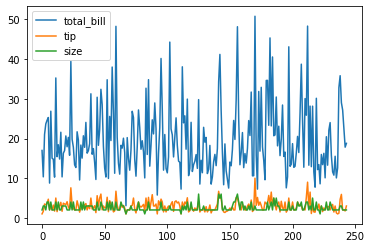

In [6]:
df.plot()

In [7]:
df.iplot()

In [11]:
df[['total_bill','tip']].iplot(kind = 'spread')

Bubblechart — разновидность диаграммы рассеяния (scatterplot), в которой используются три параметра. Третий параметр влияет на размер маркера, который показывает связь между значениями переменных, отложенных на оси абсцисс и оси ординат:

In [12]:
df.iplot(kind = 'bubble', x = 'total_bill', y = 'size', size ='tip')